In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from attgcn_api import ATTGCN_API
import numpy as np
from py_utils.TSP_loader import TSP_loader
import torch

In [3]:
def create_dir(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

In [4]:

gcn_api = ATTGCN_API()
gcn_api.init_net()
gcn_api.load_ckpt()
gcn_api.clear_gpu_memory()

Using CUDA!


In [8]:
NUM_NODES = 20
n_graphs = 1000
path = f'./data/valid_sets'
# folder = f'synthetic_nrange_{NUM_NODES}_{NUM_NODES}_{n_graphs}'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [5]:
NUM_NODES = 50
n_graphs = 1000
path = f'./data/test_sets'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [7]:
NUM_NODES = 20
n_graphs = 200000
path = f'./data/train_sets'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [6]:
tsp_loader = TSP_loader()

In [9]:
g_list = tsp_loader.load_multi_tsp_as_nx(data_dir=f'{path}/{folder}', scale_factor=0.000001, start_index=0)
gcn_api.load_nx_test_set(graph_list=g_list, num_nodes=NUM_NODES)
result = gcn_api.run_test(batch_size=100)
save_path = f'{path}/{folder}/heatmaps'
create_dir(save_path)
file_name = f'{folder}_heatmaps.npy'
np.save(file=f'{save_path}/{file_name}', arr=np.array(result))

100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


In [8]:
for i in range(200):
    g_list = tsp_loader.load_multi_tsp_as_nx(data_dir=f'{path}/{folder}', scale_factor=10**(-6), start_index=i*1000, end_index=(i+1)*1000)
    gcn_api.load_nx_test_set(graph_list=g_list, num_nodes=20)
    result = gcn_api.run_test(batch_size=250)
    save_path = f'{path}/{folder}/heatmaps'
    create_dir(save_path)
    t = i * 1000
    file_name = f'{folder}_heatmaps_{t}-{t+1000}.npy'
    np.save(file=f'{save_path}/{file_name}', arr=np.array(result))

100%|██████████| 4/4 [00:05<00:00,  1.25s/it]


# Analyze heatmaps

In [ ]:
# load heatmaps and graphs
# combine both into graphic
# add tsp plotter function

[1.00022913 0.9999932  1.00005041 1.00000927 0.99774455 0.99887944
 1.00227185 0.99269018 0.99909643 0.9997696  1.00194237 0.99976869
 1.00001097 1.00064646 0.9886569  0.99934485 1.01260221 1.00611107
 1.00023259 0.99994982]


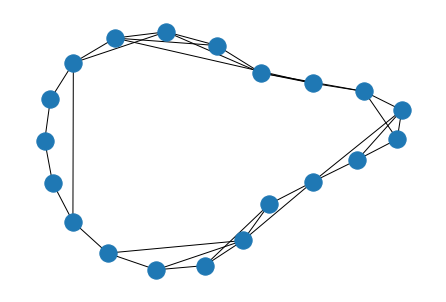

In [73]:
import matplotlib.pyplot as plt
import networkx as nx
# plt.imshow(result[4])
print(np.round(result[9],15).sum(axis=0))
g = nx.convert_matrix.from_numpy_matrix(np.round(result[9],15))
nx.draw(g)
for i in range(1000):
    g = nx.convert_matrix.from_numpy_matrix(np.round(result[i],15))
    num_edges = g.number_of_edges()
    # print(num_edges)
    num_components = nx.number_connected_components(g)
    if num_components != 1:
        print(num_components)